# Parole Models: Model building

### Willie Costello

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=(8.0, 6.0)
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

## Importing & splitting data

In [2]:
df = pd.read_csv('~/data/ParoleModels/df_binary.csv', index_col='id')

In [3]:
df_w = df[df['race']=='White'].drop('race', axis=1)
df_b = df[df['race']=='Black'].drop('race', axis=1)
df_i = df[df['race']=='Indigenous'].drop('race', axis=1)

In [4]:
X = df_w.drop('reintegration_potential', axis=1)
y = df_w['reintegration_potential']

X_b = df_b.drop('reintegration_potential', axis=1)
y_b = df_b['reintegration_potential']

X_i = df_i.drop('reintegration_potential', axis=1)
y_i = df_i['reintegration_potential']

## Initial model building & comparisons

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

In [6]:
print('Logistic Regression Model')
print('-------------------------')
log_model = LogisticRegression()
log_model.fit(X_train, y_train);

print(f'Train accuracy on White inmates:     {log_model.score(X_train, y_train)}')
print(f'Test accuracy on White inmates:      {log_model.score(X_test, y_test)}')
print(f'Test accuracy on Black inmates:      {log_model.score(X_b, y_b)}')
print(f'Test accuracy on Indigenous inmates: {log_model.score(X_i, y_i)}')

Logistic Regression Model
-------------------------
Train accuracy on White inmates:     0.7744900765789893
Test accuracy on White inmates:      0.774174869716271
Test accuracy on Black inmates:      0.7447318828165154
Test accuracy on Indigenous inmates: 0.7840717162530856


In [7]:
print('Random Forest Model')
print('-------------------')
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train);

print(f'Train accuracy on White inmates:     {rf_model.score(X_train, y_train)}')
print(f'Test accuracy on White inmates:      {rf_model.score(X_test, y_test)}')
print(f'Test accuracy on Black inmates:      {rf_model.score(X_b, y_b)}')
print(f'Test accuracy on Indigenous inmates: {rf_model.score(X_i, y_i)}')

Random Forest Model
-------------------
Train accuracy on White inmates:     0.9748548763010466
Test accuracy on White inmates:      0.8295309785755646
Test accuracy on Black inmates:      0.7366798012677745
Test accuracy on Indigenous inmates: 0.7505521631804599


In [8]:
print('XGBoost Model')
print('-------------')
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train);

print(f'Train accuracy on White inmates:     {xgb_model.score(X_train, y_train)}')
print(f'Test accuracy on White inmates:      {xgb_model.score(X_test, y_test)}')
print(f'Test accuracy on Black inmates:      {xgb_model.score(X_b, y_b)}')
print(f'Test accuracy on Indigenous inmates: {xgb_model.score(X_i, y_i)}')

XGBoost Model
-------------
Train accuracy on White inmates:     0.8267346082022032
Test accuracy on White inmates:      0.7992472495657209
Test accuracy on Black inmates:      0.7434469761863971
Test accuracy on Indigenous inmates: 0.7801740938027804


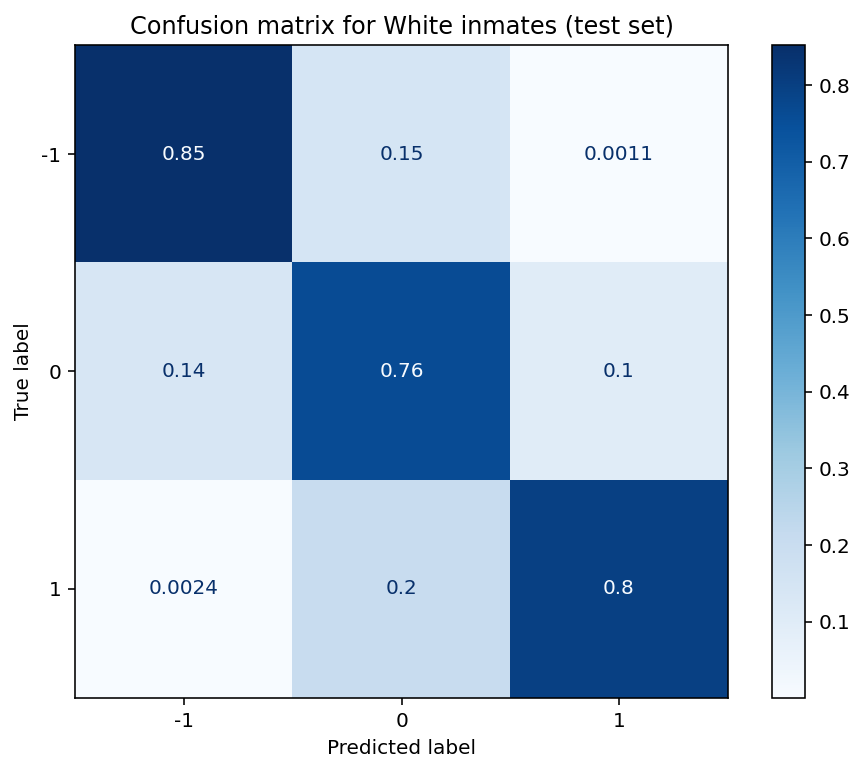

In [9]:
plot_confusion_matrix(xgb_model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for White inmates (test set)')
plt.show()

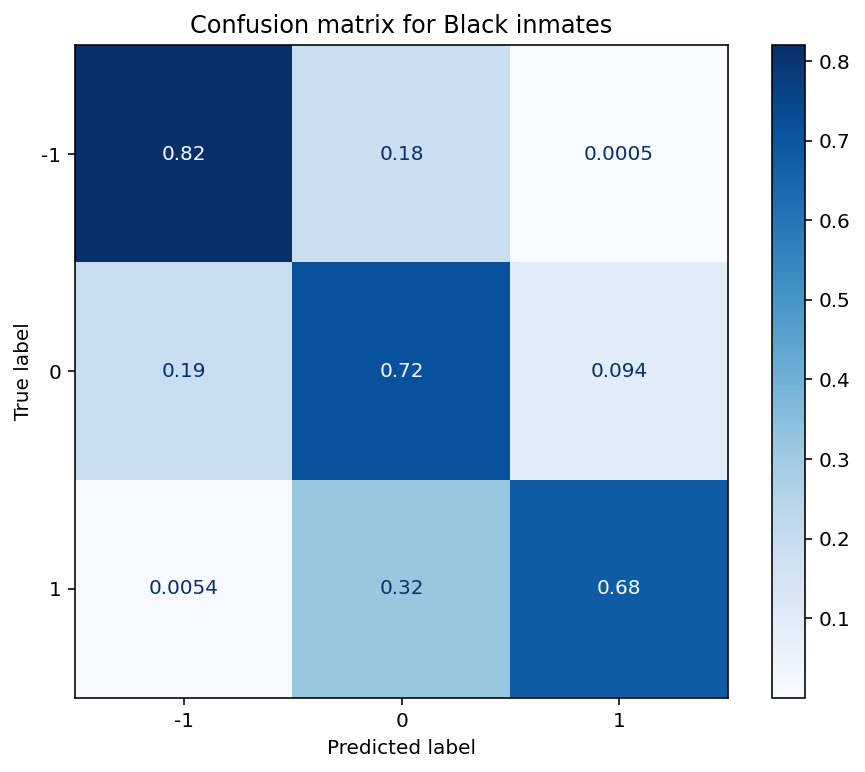

In [10]:
plot_confusion_matrix(xgb_model, X_b, y_b, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for Black inmates')
plt.show()

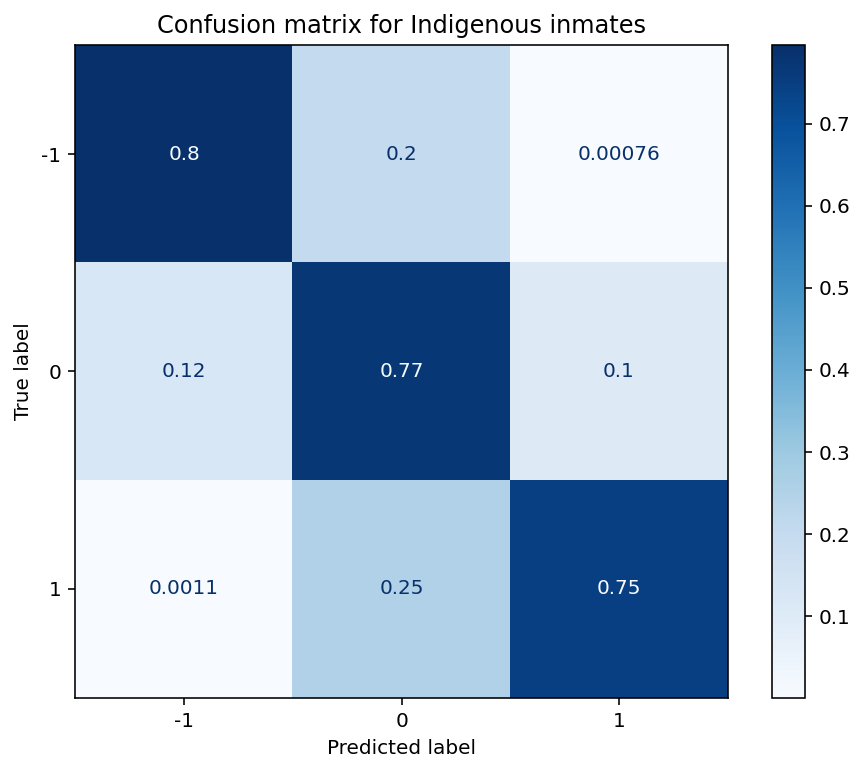

In [11]:
plot_confusion_matrix(xgb_model, X_i, y_i, cmap=plt.cm.Blues, normalize='true')
plt.title('Confusion matrix for Indigenous inmates')
plt.show()